In [12]:
'''
'OUTPUT = OVERSEAS / WORLDWIDE (if no OVERSEAS drop Records)'
Linear Regression (RMSE, Feature Importance(coefficient))
Random Forest
GBM


FEATURE importance Plot (bar Chart)
VISUALIZE W/ SEABORN
Bring them together in presentation
'''

"\n'OUTPUT = OVERSEAS / WORLDWIDE (if no OVERSEAS drop Records)'\nLinear Regression (RMSE, Feature Importance(coefficient))\nRandom Forest\nGBM\n\n\nFEATURE importance Plot (bar Chart)\nVISUALIZE W/ SEABORN\nBring them together in presentation\n"

In [13]:
import pandas as pd
import numpy as np
import sklearn.linear_model
import tensorflow as tf

In [14]:
df = pd.read_csv('Standardized_data.csv')

In [15]:
df = df.drop('Unnamed: 0', axis =1)
titles = df['Movie']
df = df.drop('Movie', axis=1)

In [16]:
df.head(1)

,Runtime (Minutes),Years Old,Production Budget,Director Twitter following,Top 3,Cast Twitter Following,Avg English Score,Rare English Score,Common English Score,Action,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Target
0,1.055334,-0.997911,0.670921,-0.195845,-0.262658,-0.428973,-1.052721,0.70303,-0.323004,-0.642262,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.220551


In [17]:
from sklearn.model_selection import train_test_split

In [34]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)
y_train = train_dataset['Target']
y_test = test_dataset['Target']
x_train = train_dataset.drop('Target', axis =1)
print(x_train.columns)
x_train = x_train[['Production Budget',
       'Director Twitter following', 'Top 3', 'Cast Twitter Following',
       'Avg English Score', 'Rare English Score', 'Common English Score']]
x_test = test_dataset.drop('Target', axis=1)
x_test = x_test[['Production Budget',
       'Director Twitter following', 'Top 3', 'Cast Twitter Following',
       'Avg English Score', 'Rare English Score', 'Common English Score']]

Index(['Runtime (Minutes)', 'Years Old', 'Production Budget',
       'Director Twitter following', 'Top 3', 'Cast Twitter Following',
       'Avg English Score', 'Rare English Score', 'Common English Score',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov', 'Dec'],
      dtype='object')


<function matplotlib.pyplot.show(*args, **kw)>

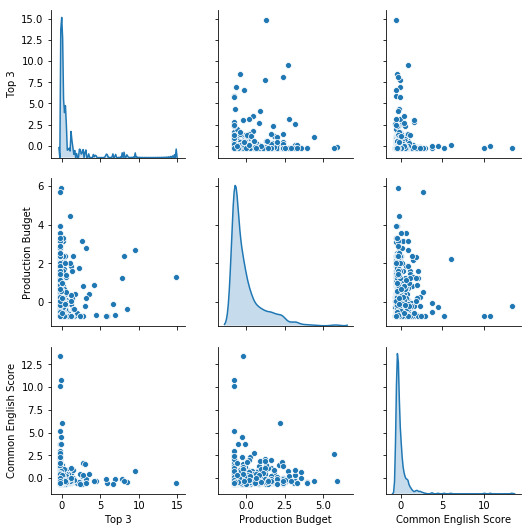

In [35]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import seaborn as sns

sns.pairplot(train_dataset[["Top 3", "Production Budget", "Common English Score"]], diag_kind="kde")
plt.show

In [36]:
from sklearn.metrics import mean_squared_error as mse
model = LinearRegression().fit(x_train, y_train)

model.predict(x_test)

array([0.69640651, 0.60718166, 0.65995957, 0.63578517, 0.61366167,
       0.62511702, 0.59673935, 0.59686681, 0.66156607, 0.63018132,
       0.64947828, 0.72543469, 0.60003435, 0.61320979, 0.60472673,
       0.60490053, 0.65171671, 0.64645227, 0.61802745, 0.66552999,
       0.61831469, 0.59436581, 0.60657662, 0.6516493 , 0.58359558,
       0.61598885, 0.65271984, 0.64662597, 0.60939885, 0.6236768 ,
       0.65841315, 0.673965  , 0.79703524, 0.65892438, 0.65504337,
       0.60024299, 0.587636  , 0.63014033, 0.630986  , 0.62668319,
       0.60071021, 0.59805736, 0.62246904, 0.60345991, 0.65373772,
       0.61463106, 0.72054726, 0.65503576, 0.59221451, 0.61976698,
       0.58222621, 0.58332461, 0.68389864, 0.80303867, 0.61040444,
       0.59988506, 0.66293719, 0.61140343, 0.58072703, 0.66699032,
       0.58029956, 0.57933292, 0.58143799, 0.58340247, 0.5923449 ,
       0.58550117, 0.6041745 , 0.59189468, 0.6140726 , 0.58786188,
       0.59575726, 0.56904901, 0.61754103, 0.57899218, 0.57074

In [37]:
def getMetrics(model):
    train_r_2= model.score(x_train, y_train)
    y_preds = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    train_mse = np.sqrt(mse(y_train,y_pred_train))
    test_r_2 = model.score(x_test, y_test)
    test_mse =  np.sqrt(mse(y_test, y_preds))
    model_metrics = {'Train R2': train_r_2,
                    'Test R2' : test_r_2,
                    'Train RMSE': train_mse,
                    'Test RMSE': test_mse,
                    'Test Predictions': y_preds}
    return model_metrics
    

In [38]:
mets = getMetrics(model)
print(mets)

{'Train R2': 0.004282530410282148, 'Test R2': -0.03306581307544487, 'Train RMSE': 0.6688939453427286, 'Test RMSE': 0.2381243901271054, 'Test Predictions': array([0.69640651, 0.60718166, 0.65995957, 0.63578517, 0.61366167,
       0.62511702, 0.59673935, 0.59686681, 0.66156607, 0.63018132,
       0.64947828, 0.72543469, 0.60003435, 0.61320979, 0.60472673,
       0.60490053, 0.65171671, 0.64645227, 0.61802745, 0.66552999,
       0.61831469, 0.59436581, 0.60657662, 0.6516493 , 0.58359558,
       0.61598885, 0.65271984, 0.64662597, 0.60939885, 0.6236768 ,
       0.65841315, 0.673965  , 0.79703524, 0.65892438, 0.65504337,
       0.60024299, 0.587636  , 0.63014033, 0.630986  , 0.62668319,
       0.60071021, 0.59805736, 0.62246904, 0.60345991, 0.65373772,
       0.61463106, 0.72054726, 0.65503576, 0.59221451, 0.61976698,
       0.58222621, 0.58332461, 0.68389864, 0.80303867, 0.61040444,
       0.59988506, 0.66293719, 0.61140343, 0.58072703, 0.66699032,
       0.58029956, 0.57933292, 0.58143799

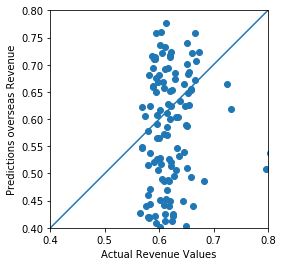

In [45]:
test_predictions = model.predict(x_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_predictions, y_test)
plt.xlabel('Actual Revenue Values')
plt.ylabel('Predictions overseas Revenue')
lims = [.4, .8]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


In [45]:
from sklearn.externals import joblib

filename = 'Linear_Regressor.sav'
joblib.dump(model, filename)

['Linear_Regressor.sav']